<a href="https://colab.research.google.com/github/ZarinSaima333/Bracu_CSE428_Image_processing/blob/main/Image_Processing_Assignmnet1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Necessary library import

In [ ]:
import numpy as np
from skimage import io, color, exposure , transform
import matplotlib.pyplot as plt

# Task 1 - Basic Image Operation

import your image or any photo taken by you (`sample.jpeg`) as a numpy array, save it in the varaible `I`.

A picture taken from your phone of any scenary/streets/building is better.

remember your image name MUST be `sample.jpeg`.

Make sure the height and the width of the image is **smaller than 1000 pixels**.

Height is 2048
Width is 1532
Rescaled image to height: 2048 and width: 1532


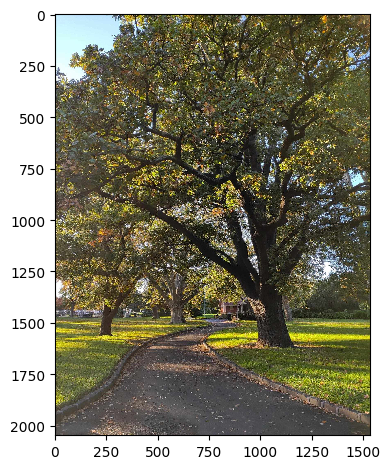

In [ ]:
I = io.imread("sample.jpeg") # Replace None with appropriate function call line
height, weidth, nchannels = I.shape

# find the height and the width of the image
H = height # should contain height
W = weidth # should contain width
print("Height is", H)
print("Width is", W)

### BEGIN SOLUTION
if H > 1000 or W > 1000:
    scale_factor = min(1000 / H, 1000 / W)
    I_rescaled = transform.rescale(I, scale_factor, anti_aliasing=True,channel_axis=-1)
    img_resized = (I_rescaled* 255).astype(np.uint8)
    H, W = I.shape[:2]
    print("Rescaled image to height:", H, "and width:", W)
io.imshow(I)
### END SOLUTION

Data type of the image before normalization: uint8


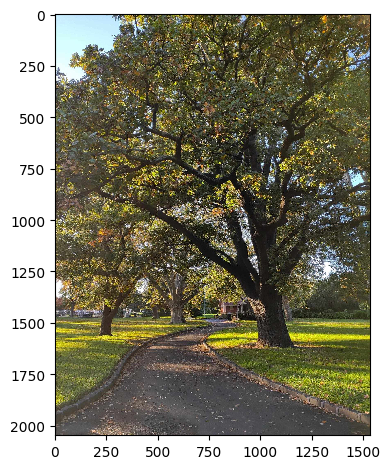

In [ ]:
# Normalize the image so that the gray scales are between 0 and 1. Save it to I and display the image
print("Data type of the image before normalization:", I.dtype)

# Convert to float if necessary
if I.dtype == np.uint8:
    I = I.astype(np.float32)  # Convert to float32
### BEGIN SOLUTION
I = I / 255.0
io.imshow(I)
### END SOLUTION

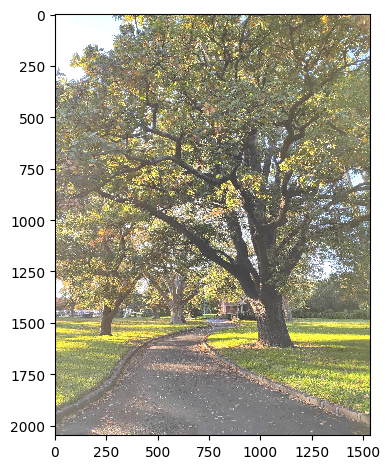

In [ ]:
#Increase the brightness of the image without changing the contrast.
# Save the resulting image in I_bright and display it.
I_bright = I + 0.2

### BEGIN SOLUTION
I_bright = np.clip(I_bright, 0, 1)
io.imshow(I_bright)
### END SOLUTION

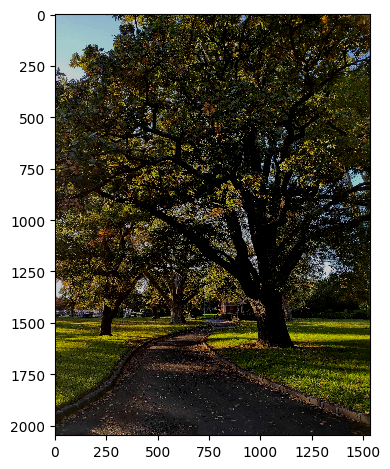

In [ ]:
# Decrease the brightness of the image without changing the contrast.
# Save the resulting image in I_dark and display it.
I_dark = I - 0.2

### BEGIN SOLUTION
I_dark = np.clip(I_dark, 0, 1)
io.imshow(I_dark)
### END SOLUTION

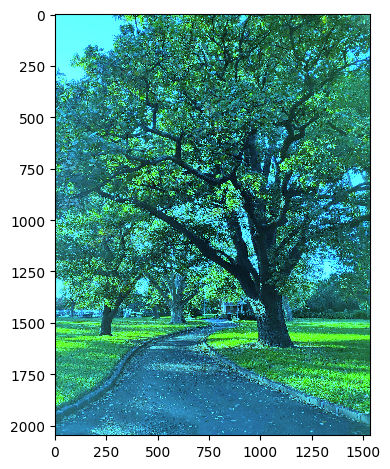

In [ ]:
# Multiply the three channels of image I with three DIFFERENT numbers between 0.3 and 3
# Save the resulting image in I_tint and display it.
# The resulting image should have some color shift
I_tint = np.zeros(I.shape)
I_tint.shape
# HINT:
# I_tint = np.zeros(I.shape)
# I_tint[:, :, 0] =  ..... I[:, :, 0].....
# ......

### BEGIN SOLUTION

I_tint[:, :, 0] = I[:, :, 0] * 0.5  #  factor 0.5(For red channel)
I_tint[:, :, 1] = I[:, :, 1] * 1.5  # factor 1.5(For green channel)
I_tint[:, :, 2] = I[:, :, 2] * 2.0  # factor 2.0(For blue channel)

# Clip values to be between 0 and 1 to avoid overflow
I_tint = np.clip(I_tint, 0, 1)

# Display the tinted image
io.imshow(I_tint)
### END SOLUTION

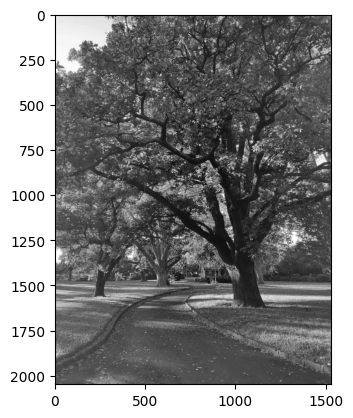

In [ ]:
# Convert the image into a grayscale image.
# Save it to I_gray and display it
I_gray = color.rgb2gray(I)

### BEGIN SOLUTION

plt.imshow(I_gray, cmap='gray')
### END SOLUTION

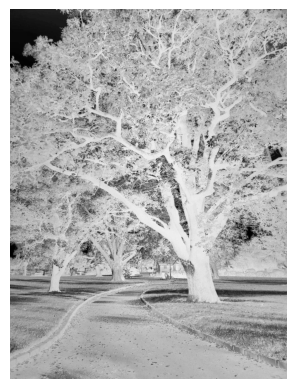

In [ ]:
# Display the negative of the grayscale image

### BEGIN SOLUTION
I_neg = 1 - I_gray

plt.imshow(I_neg, cmap='gray')
plt.axis('off')
plt.show()

### END SOLUTION

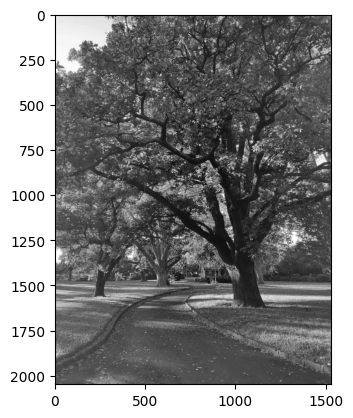

In [ ]:
# Artificially degrade the **grayscale image** by reducing it contrast
# You can do so by recaling the gray values and concentrating them in a narrow range,
# say between 0.3 and 0.6.
# Save the image as I_degraded and display it
# HINT: SEE lec-4-demo-codes

I_degraded = exposure.rescale_intensity(I_gray, in_range=(0, 1), out_range=(0.3, 0.6))


### BEGIN SOLUTION

plt.imshow(I_degraded, cmap='gray')
### END SOLUTION

In [ ]:
import numpy as np

def piecewise_contrast_stretch(I_gray, r1, r2, s1, s2):
    """
    Perform piecewise linear contrast stretching on a grayscale image.

    Parameters:
    - I_gray: Input grayscale image, normalized between 0 and 1.
    - r1: Lower threshold for stretching.
    - r2: Upper threshold for stretching.
    - s1: Output value corresponding to r1.
    - s2: Output value corresponding to r2.

    Returns:
    - I_stretched: Contrast-stretched grayscale image.
    """
    # Initialize the output image with the same shape as the input image
    I_stretched = np.zeros_like(I_gray)

    # Apply piecewise linear transformations
    # For values less than r1
    I_stretched[I_gray < r1] = (s1 / r1) * I_gray[I_gray < r1]

    # For values between r1 and r2
    mask_between_r1_r2 = (I_gray >= r1) & (I_gray <= r2)
    I_stretched[mask_between_r1_r2] = ((s2 - s1) / (r2 - r1)) * (I_gray[mask_between_r1_r2] - r1) + s1

    # For values greater than r2
    I_stretched[I_gray > r2] = ((1 - s2) / (1 - r2)) * (I_gray[I_gray > r2] - r2) + s2

    return I_stretched


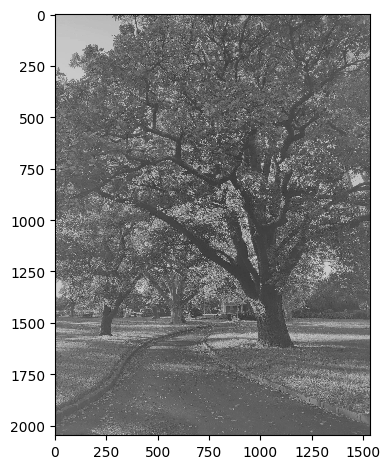

In [ ]:
# To test your implementation, contrast strech the degraded image I_degrade
r1 = 0.3
r2 = 0.6
s1 = 0.2
s2 = 0.8
I_stretched = piecewise_contrast_stretch(I_degraded, r1, r2, s1, s2)
io.imshow(I_stretched)




# Task 2 - Histogram and Equalization

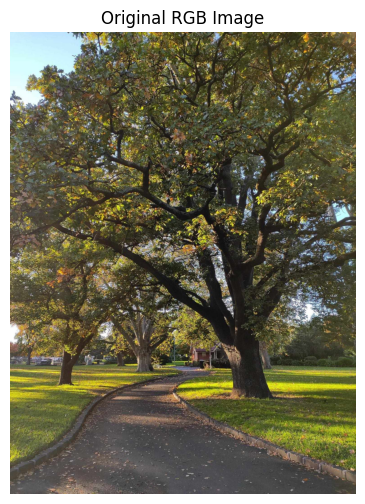

<ipython-input-25-5014126435b9>:25: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, channel_index + 2)


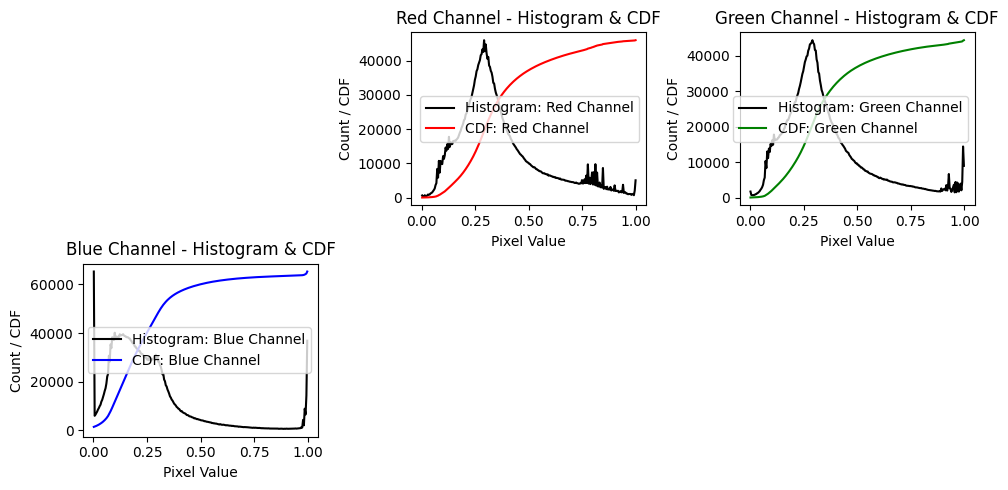

In [ ]:
import matplotlib.pyplot as plt
from skimage import io, exposure

plt.figure(figsize=(12, 6))
plt.imshow(I)
plt.title("Original RGB Image")
plt.axis('off')
plt.show()


plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)

#colors and titles for each channel
channels_clrs = ('red', 'green', 'blue')
channels_lbls = ('Red Channel', 'Green Channel', 'Blue Channel')


for channel_index, channel_color in enumerate(channels_clrs):

    hist_values, pixel_bins = exposure.histogram(I[:, :, channel_index])
    cumulative_distr, cumulative_bins = exposure.cumulative_distribution(I[:, :, channel_index], nbins=256)


    plt.subplot(2, 3, channel_index + 2)
    plt.plot(pixel_bins, hist_values, color='black', label=f'Histogram: {channels_lbls[channel_index]}')
    plt.plot(cumulative_bins, cumulative_distr * hist_values.max(), color=channel_color, label=f'CDF: {channels_lbls[channel_index]}')


    plt.title(f"{channels_lbls[channel_index]} - Histogram & CDF")
    plt.xlabel("Pixel Value")
    plt.ylabel("Count / CDF")
    plt.legend(loc='best')


plt.tight_layout()
plt.show()


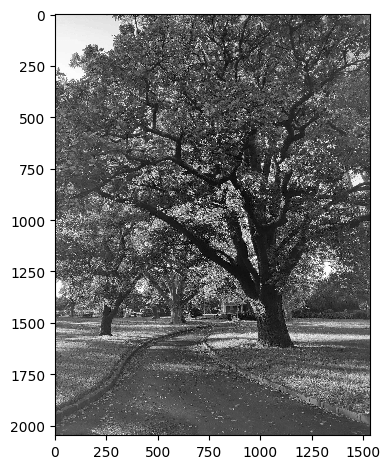

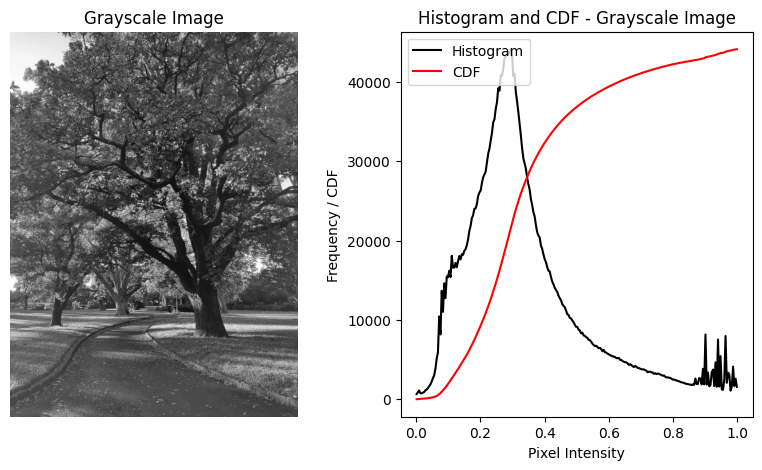

In [ ]:
# Plot the Image and its histogram + cdf of the grayscale image I_gray

### BEGIN SOLUTION

io.imshow(I_gray)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(I_gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

hist, hist_centers = exposure.histogram(I_gray)

cdf, cdf_bins = exposure.cumulative_distribution(I_gray, nbins=256)

plt.subplot(1, 2, 2)
plt.plot(hist_centers, hist, color='black', label='Histogram')
plt.plot(cdf_bins, cdf * hist.max(), color='red', label='CDF')
plt.title('Histogram and CDF - Grayscale Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency / CDF')
plt.legend(loc='upper left')


plt.show()


### END SOLUTION

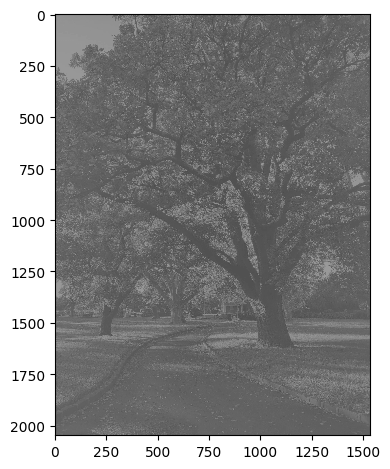

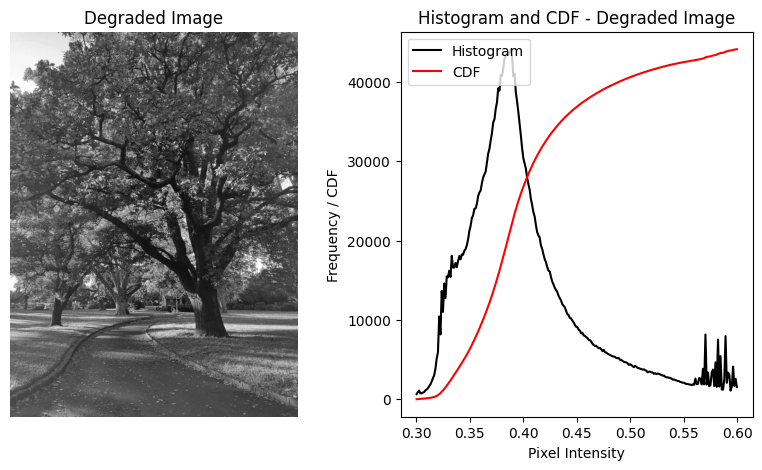

In [ ]:
# Plot the Image and its histogram + cdf of the degraded image I_degraded

### BEGIN SOLUTION

io.imshow(I_degraded)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(I_degraded, cmap ="gray")
plt.title("Degraded Image")
plt.axis('off')

hist, hist_centers = exposure.histogram(I_degraded)

cdf, cdf_bins = exposure.cumulative_distribution(I_degraded, nbins=256)

plt.subplot(1, 2, 2)
plt.plot(hist_centers, hist, color='black', label='Histogram')
plt.plot(cdf_bins, cdf * hist.max(), color='red', label='CDF')
plt.title('Histogram and CDF - Degraded Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency / CDF')
plt.legend(loc='upper left')


plt.show()




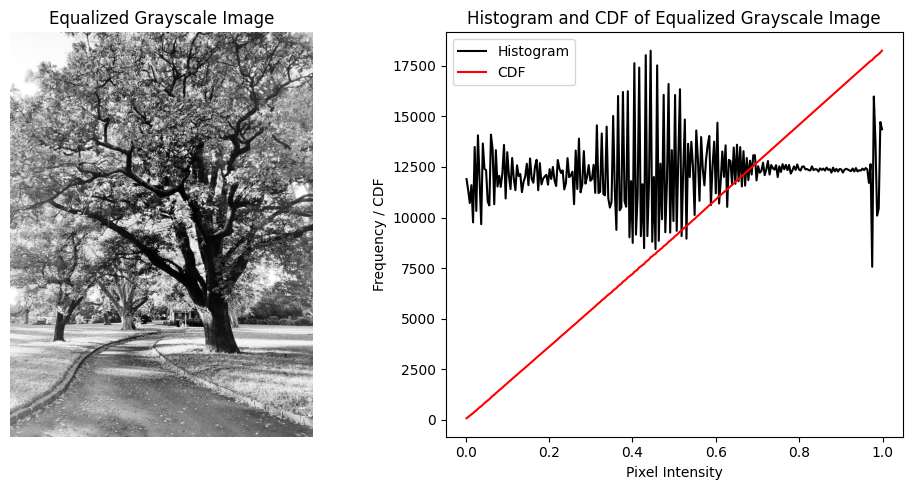

In [ ]:
# Equalize the histogram of the degraded image I_degraded
# Save the result in I_recon_gray, display the image along with its histogram

I = io.imread("sample.jpeg")
I = I / 255.0

I_degraded = color.rgb2gray(I)

I_recon_gray = exposure.equalize_hist(I_degraded)

plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
plt.imshow(I_recon_gray, cmap='gray')
plt.title("Equalized Grayscale Image")
plt.axis('off')

hist, hist_centers = exposure.histogram(I_recon_gray)
cdf, cdf_bins = exposure.cumulative_distribution(I_recon_gray, nbins=256)

plt.subplot(1, 2, 2)
plt.plot(hist_centers, hist, color='black', label='Histogram')
plt.plot(cdf_bins, cdf * hist.max(), color='red', label='CDF')
plt.title('Histogram and CDF of Equalized Grayscale Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency / CDF')
plt.legend()

plt.tight_layout()
plt.show()




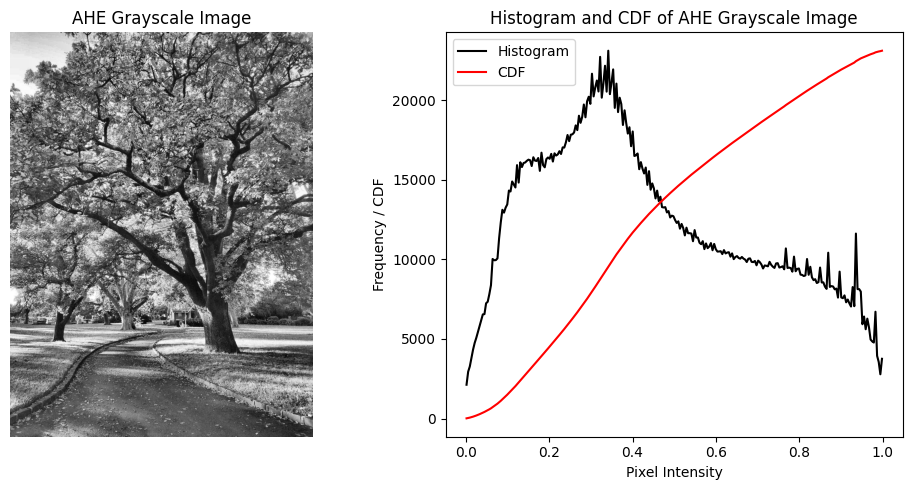

In [ ]:
# Equalize the histogram of the degraded image I_degraded using AHE
# Save the result in I_recon_gray_2, display the image along with its histogram

I_recon_gray_2 = exposure.equalize_adapthist(I_degraded) # Perform Adaptive Histogram Equalization (AHE)

plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
plt.imshow(I_recon_gray_2, cmap='gray')
plt.title("AHE Grayscale Image")
plt.axis('off')


hist, hist_centers = exposure.histogram(I_recon_gray_2)
cdf, cdf_bins = exposure.cumulative_distribution(I_recon_gray_2, nbins=256)

plt.subplot(1, 2, 2)
plt.plot(hist_centers, hist, color='black', label='Histogram')
plt.plot(cdf_bins, cdf * hist.max(), color='red', label='CDF')
plt.title('Histogram and CDF of AHE Grayscale Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency / CDF')
plt.legend()

plt.tight_layout()
plt.show()

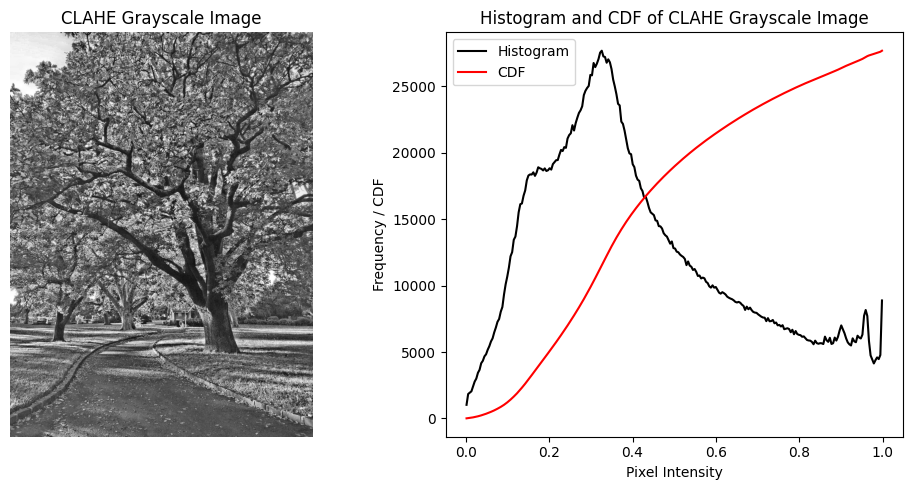

In [ ]:
# Equalize the histogram of the degraded image I_degraded using CLAHE
# Save the result in I_recon_gray_2, display the image along with its histogram

I_recon_gray_3 = exposure.equalize_adapthist(I_degraded, kernel_size=(36,36),clip_limit=0.01)


plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
plt.imshow(I_recon_gray_3, cmap='gray')
plt.title("CLAHE Grayscale Image")
plt.axis('off')


hist, hist_centers = exposure.histogram(I_recon_gray_3)
cdf, cdf_bins = exposure.cumulative_distribution(I_recon_gray_3, nbins=256)

plt.subplot(1, 2, 2)
plt.plot(hist_centers, hist, color='black', label='Histogram')
plt.plot(cdf_bins, cdf * hist.max(), color='red', label='CDF')
plt.title('Histogram and CDF of CLAHE Grayscale Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency / CDF')
plt.legend()

plt.tight_layout()
plt.show()

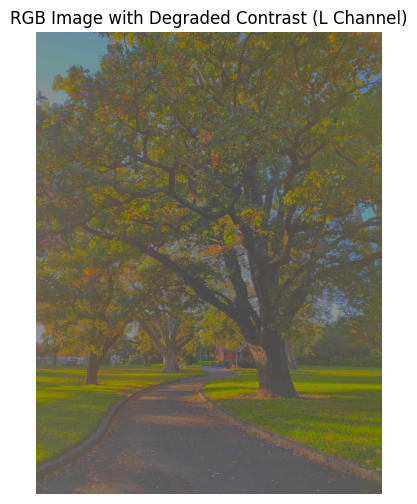

In [ ]:
# Artificially degrade the original **RGB image** by reducing it contrast
# You can do so by recaling the values of the L channel (in LAB color space)
# and concentrating them in a narrow range, say between 0.3 and 0.6.
# Save the image as I_rgb_degraded and display it
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color

I_lab = color.rgb2lab(I)

L_channel = I_lab[:, :, 0]

# Rescale the L channel values to the range [0.3, 0.6]
L_min, L_max = L_channel.min(), L_channel.max()
L_scaled = (L_channel - L_min) / (L_max - L_min)
L_degraded = L_scaled * (0.6 - 0.3) + 0.3


I_lab[:, :, 0] = L_degraded * 100

I_rgb_degraded = color.lab2rgb(I_lab)


plt.figure(figsize=(6, 6))
plt.imshow(I_rgb_degraded)
plt.title("RGB Image with Degraded Contrast (L Channel)")
plt.axis('off')
plt.show()


<ipython-input-38-8cef76909196>:26: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 93 negative Z values that have been clipped to zero
  I_recon_color = color.lab2rgb(I_lab_clahe) # Convert the LAB image back to RGB


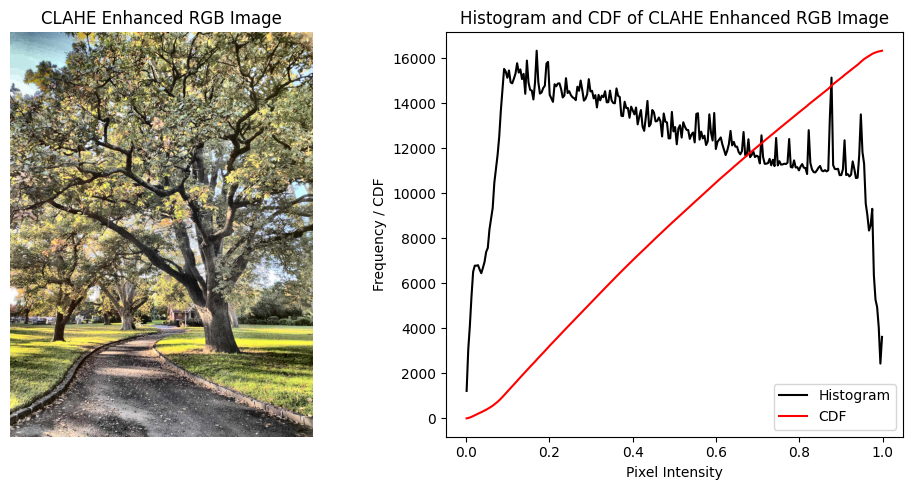

In [ ]:
# Equalize the histogram of the degraded color image I_rgb_degraded using CLAHE
# Save the result in I_recon_color, display the image along with its histogram
# HINT: You have to convert to LAB first
# See the lecture and lecture-4-demo-codes
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, exposure, io

I = io.imread("sample.jpeg")
I = I / 255.0

I_lab = color.rgb2lab(I)

L = I_lab[:, :, 0]

L_normalized = (L - L.min()) / (L.max() - L.min())

# Apply CLAHE to the normalized L channel
L_clahe = exposure.equalize_adapthist(L_normalized, clip_limit=0.03)

L_clahe_rescaled = L_clahe * (L.max() - L.min()) + L.min()

I_lab_clahe = I_lab.copy()
I_lab_clahe[:, :, 0] = L_clahe_rescaled

I_recon_color = color.lab2rgb(I_lab_clahe) # Convert the LAB image back to RGB

plt.figure(figsize=(10, 5)) # Display the CLAHE-enhanced RGB image
plt.subplot(1, 2, 1)
plt.imshow(I_recon_color)
plt.title("CLAHE Enhanced RGB Image")
plt.axis('off')

I_gray = color.rgb2gray(I_recon_color)
hist, hist_centers = exposure.histogram(I_gray)
cdf, cdf_bins = exposure.cumulative_distribution(I_gray, nbins=256)

plt.subplot(1, 2, 2)
plt.plot(hist_centers, hist, color='black', label='Histogram')
plt.plot(cdf_bins, cdf * hist.max(), color='red', label='CDF')
plt.title('Histogram and CDF of CLAHE Enhanced RGB Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency / CDF')
plt.legend()

plt.tight_layout()
plt.show()


# Task 3 - Open Ended
 ## ***There are 3 images in the drive directory below. Look at the questions from the brackets [.]. Answer them in the provided text cell at the bottom.***

 ### link:  https://drive.google.com/drive/folders/1ft3XrO-MGxhxL2PfcLCFQjU0wvvlLAv4?usp=sharing

In [ ]:
# Dark_Room.jpg = very dark [The windows are on walls. How does the wall look like?]
# Foggy_Road.jpg = washed out/foggy [How many vehicles do you think there are?]
# Read_the_code.jpg = Dark RGB Barcode [What is hidden in the Barcode?
#                                       Make it scanable, scan it and say something about the hidden message.]

# Your task is to improve these images using
# contrast stretching, histogram equalization, AHE or CLAHE
# try different combination of parameter settings to see which produces the best result

### BEGIN SOLUTION

### END SOLUTION

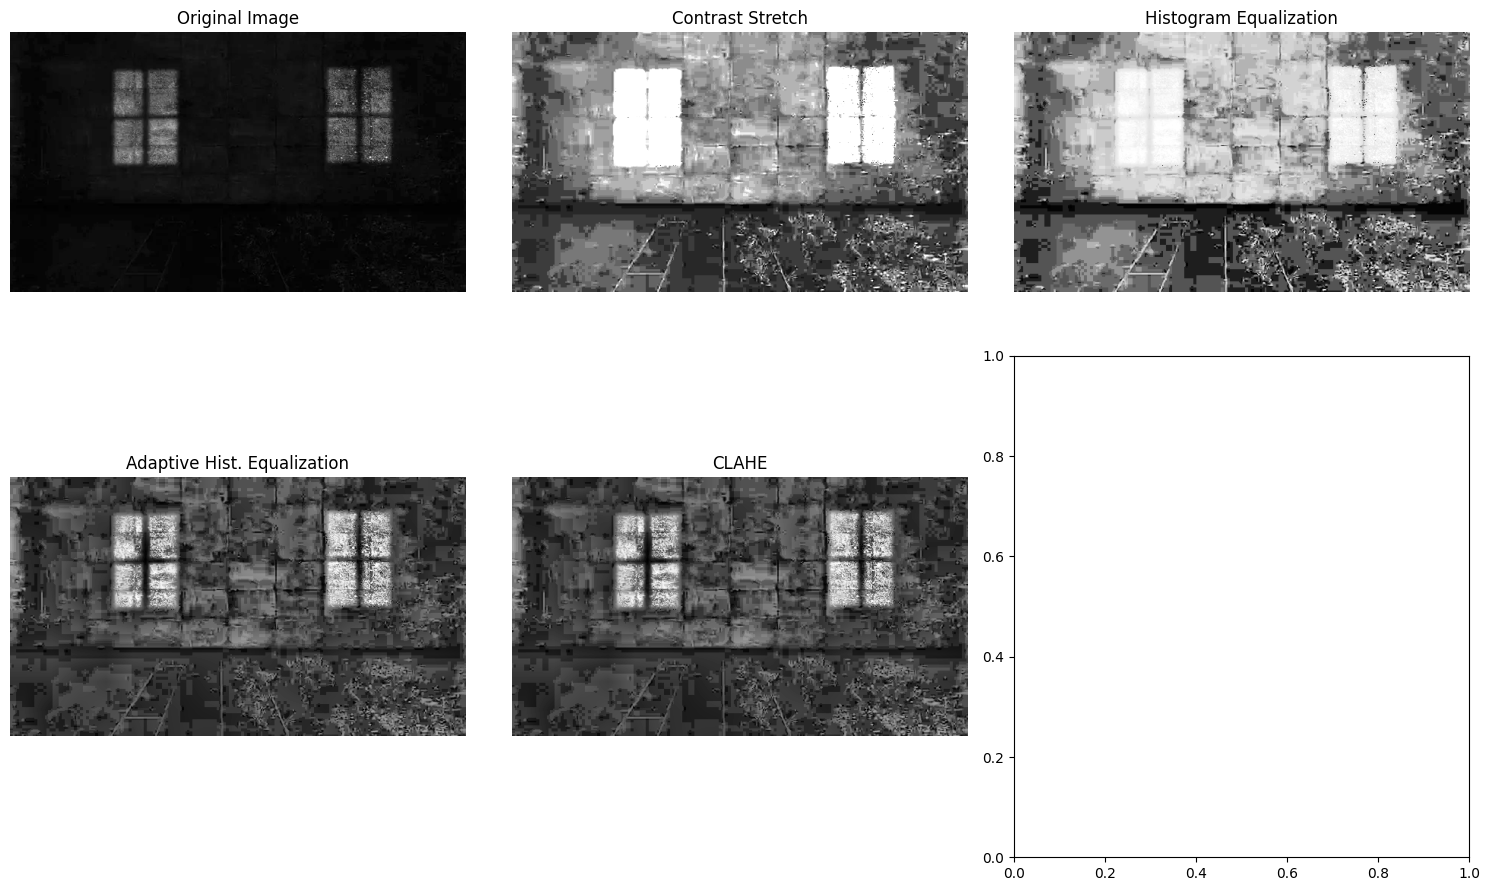

In [164]:
#Contrast Stretching

# Load the image
Dark_rgb = io.imread("Dark_Room.jpg")

Dark = color.rgb2gray(Dark_rgb)

# Stretch contrast
Dark_I_stretch = np.clip(4 * (Dark +0.2), 0, 1)

# Histogram equalization
Dark_I_eq = exposure.equalize_hist(Dark)

# Adaptive histogram equalization
Dark_I_adapt_eq = exposure.equalize_adapthist(Dark,kernel_size=(36,36),clip_limit=0.09)

# CLAHE (Contrast Limited Adaptive Histogram Equalization)
Dark_I_clahe = exposure.equalize_adapthist(Dark, kernel_size=(36,36), clip_limit=0.09)

## Plot all images in one row
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Original image
axes[0][0].imshow(Dark, cmap='gray')
axes[0][0].set_title("Original Image")
axes[0][0].axis('off')

# Contrast Stretched Image
axes[0][1].imshow(Dark_I_stretch, cmap='gray')
axes[0][1].set_title("Contrast Stretch")
axes[0][1].axis('off')

# Histogram Equalized Image
axes[0][2].imshow(Dark_I_eq, cmap='gray')
axes[0][2].set_title("Histogram Equalization")
axes[0][2].axis('off')

# Adaptive Histogram Equalization Image
axes[1][0].imshow(Dark_I_adapt_eq, cmap='gray')
axes[1][0].set_title("Adaptive Hist. Equalization")
axes[1][0].axis('off')

# CLAHE Image
axes[1][1].imshow(Dark_I_clahe, cmap='gray')
axes[1][1].set_title("CLAHE")
axes[1][1].axis('off')

# Show all images side by side
plt.tight_layout()
plt.show()





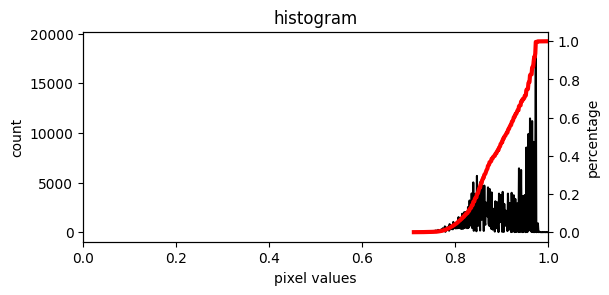

In [167]:
foggy_rgb = io.imread("Foggy_Road.jpg")
foggy = color.rgb2gray(foggy_rgb)
def plot_hist(I, nbins=256, normalize=False, plot_cdf=True):
    hist, bins_hist = exposure.histogram(I.ravel(), nbins=nbins, normalize=normalize)
    plt.plot(bins_hist, hist, 'k')
    plt.xlabel("pixel values")
    if normalize:
        plt.ylabel("probability")
    else:
        plt.ylabel("count")
    xmax = 1 if I.max() <= 1 else 255
    plt.xlim([0, xmax])

    if plot_cdf:
        cdf, bins_cdf = exposure.cumulative_distribution(I.ravel(), nbins=nbins)
        plt.twinx()
        plt.plot(bins_cdf, cdf, 'r', lw=3)
        plt.ylabel("percentage")


def plot_img_and_hist(I, nbins=256, normalize=False, plot_cdf=True, figsize=(12, 6)):

    plt.subplot(2, 1, 2)
    plot_hist(I, nbins=nbins, normalize=normalize, plot_cdf=plot_cdf)
    plt.title("histogram")

plt.rcParams['figure.figsize'] = (6, 6)
plot_img_and_hist(foggy )

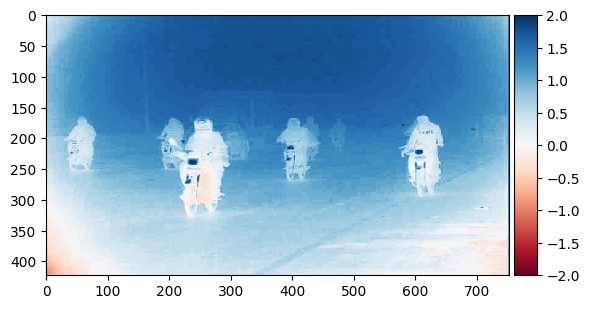

In [162]:

foggy_I_stretch = (foggy-.8)/(.9-.8)
io.imshow(foggy_I_stretch);

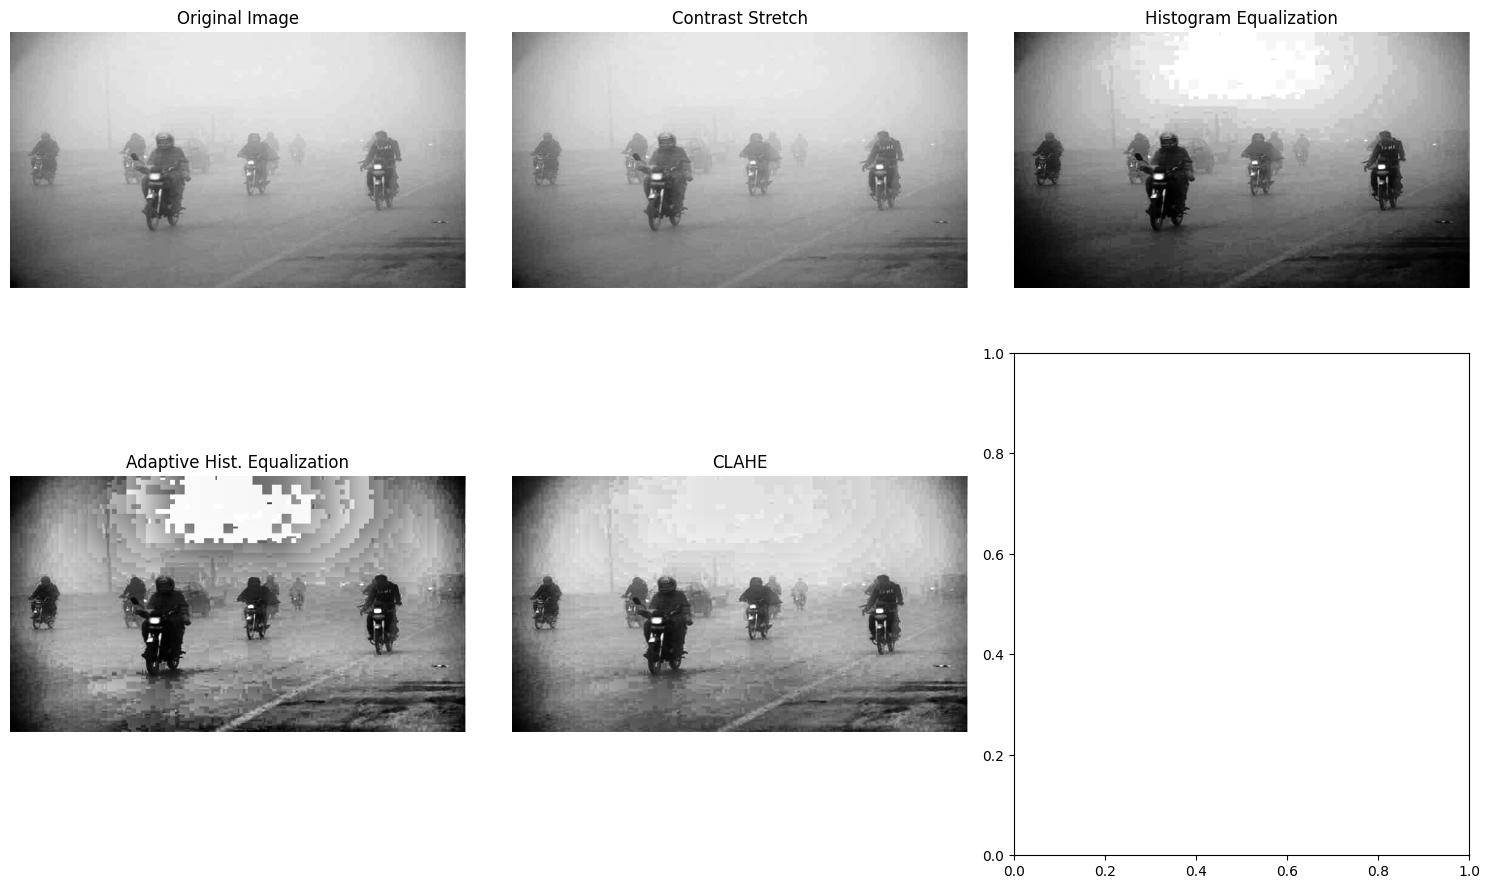

In [163]:
#Contrast Stretching

# Load the image
foggy_rgb = io.imread("Foggy_Road.jpg")
foggy = color.rgb2gray(foggy_rgb)


# Histogram equalization
foggy_I_eq = exposure.equalize_hist(foggy)

# Adaptive histogram equalization
foggy_I_adapt_eq = exposure.equalize_adapthist(foggy,kernel_size=(128, 128), clip_limit=0)

# CLAHE (Contrast Limited Adaptive Histogram Equalization)
foggy_I_clahe = exposure.equalize_adapthist(foggy, kernel_size=(128, 128), clip_limit=0.03)

# Plot all images in one row
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Original image
axes[0][0].imshow(foggy, cmap='gray')
axes[0][0].set_title("Original Image")
axes[0][0].axis('off')

# Contrast Stretched Image
axes[0][1].imshow(foggy_I_stretch, cmap='gray')
axes[0][1].set_title("Contrast Stretch")
axes[0][1].axis('off')

# Histogram Equalized Image
axes[0][2].imshow(foggy_I_eq, cmap='gray')
axes[0][2].set_title("Histogram Equalization")
axes[0][2].axis('off')

# Adaptive Histogram Equalization Image
axes[1][0].imshow(foggy_I_adapt_eq, cmap='gray')
axes[1][0].set_title("Adaptive Hist. Equalization")
axes[1][0].axis('off')

# CLAHE Image
axes[1][1].imshow(foggy_I_clahe, cmap='gray')
axes[1][1].set_title("CLAHE")
axes[1][1].axis('off')

# Show all images side by side
plt.tight_layout()
plt.show()

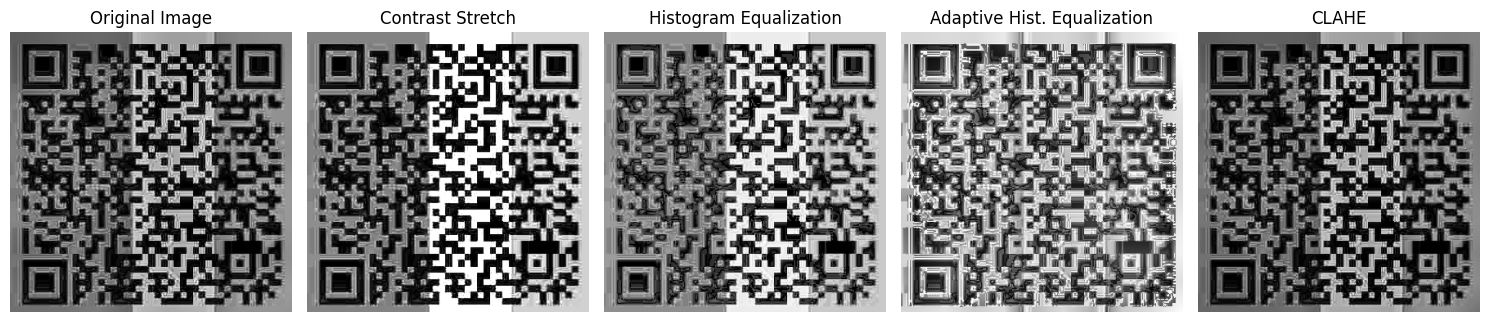

<Figure size 600x600 with 0 Axes>

In [168]:
#Contrast Stretching

# Load the image
code_rgb = io.imread("Read_the_code.jpg")
code = color.rgb2gray(code_rgb)

# Stretch contrast
Code_I_stretch = np.clip(4 * (code +0.2), 0, 1)

# Histogram equalization
Code_I_eq = exposure.equalize_hist(code)

# Adaptive histogram equalization
Code_I_adapt_eq = exposure.equalize_adapthist(code,kernel_size=(36, 36), clip_limit=0)

# CLAHE (Contrast Limited Adaptive Histogram Equalization)
Code_I_clahe = exposure.equalize_adapthist(code, kernel_size=(36, 36), clip_limit=0.01)

# Plot all images in one row
fig, axes = plt.subplots(1, 5, figsize=(15, 10))

# Original image
axes[0].imshow(code_I_adapt_eq, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

# Contrast Stretched Image
axes[1].imshow(Code_I_stretch, cmap='gray')
axes[1].set_title("Contrast Stretch")
axes[1].axis('off')

# Histogram Equalized Image
axes[2].imshow(Code_I_eq, cmap='gray')
axes[2].set_title("Histogram Equalization")
axes[2].axis('off')

# Adaptive Histogram Equalization Image
axes[3].imshow(Code_I_adapt_eq, cmap='gray')
axes[3].set_title("Adaptive Hist. Equalization")
axes[3].axis('off')

# CLAHE Image
axes[4].imshow(Code_I_clahe, cmap='gray')
axes[4].set_title("CLAHE")
axes[4].axis('off')

# Show all images side by side
plt.tight_layout()
plt.show()

# Show all images side by side
plt.tight_layout()
plt.show()

### Your answers:





1.   **Dark Image:** On the dark image, after using contrast stretching, histogram equalization, AHE and CLAHE we can almost clearly see that there are rectangular tiles all over the wall. CLAHE AHE gives the best result here. And,  Histogram Equalization and Contrast Strething gives clear information about the flr that it is a wooden floor.

2. **Foggy Image:** After applying the transformations we can see there are 7 bikes(clearly visible), 1 car in the middle and 2 car at the very right (not very visible). And one truck behind a car. In total there are 11 vehicles. Also, in this case CLAHE and AHE did a good job.

3. **Read the Code:** After applying contrast stretching, histogram equalization, AHE and CLAHE we can see that there is a QR Code and it is scanable. It redirected to document of Practise Sheet of CSE428: Image Processing. It will help us to have a strong grip on image processing.
URL:https://docs.google.com/document/d/1Y3Z_DvDcCJG9a0C4N4CMfX4KM5wGP-cxBekb8WT2cfg/edit?usp=drivesdk





